In [1]:
from scripts.classes import *
from IPython.display import display
import os
import pickle
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE, SpectralEmbedding

os.chdir('..')
print(os.getcwd())

/Users/michaelhofer/Documents/GitHub/NeuronVisualizer2.0


In [2]:

WORMS = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i}.pkl', 'rb') as file:
		worm = pickle.load(file)
		WORMS.append(worm)
	


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.losses import Loss
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
# Create a Sequential model
model = tf.keras.Sequential([
    # Input layer with 103 units
   	layers.Flatten(),
    # First hidden layer with 25 nodes and ReLU activation
    layers.Dense(25, activation='relu'),
    # Second hidden layer with 10 nodes and ReLU activation
    layers.Dense(10, activation='relu'),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    # Output layer with 8 nodes and linear activation
    layers.Dense(3, activation='linear')
])


In [17]:
data = WORMS[0]
data.fit_model(LogisticRegression())
data.cluster_BPT(nrep=5, max_clusters=5)
Y = data.xc[:, 4, np.argmax(data.p_memoryless[4, :])]  # according to mr.markov himself
X = data.neuron_traces.T
#vs.make_movie(quivers=False)

<class 'keras.src.engine.sequential.Sequential'>
True
Accuracy: 0.8814153649984061
Probability map has shape: (3137, 28)
Testing markovianity - repetition  1
Testing markovianity - repetition  2
Testing markovianity - repetition  3
Testing markovianity - repetition  4
Testing markovianity - repetition  5


<IPython.core.display.Javascript object>

In [24]:
Y = data.xc[:, 3, np.argmax(data.p_memoryless[3, :])]  # according to mr.markov himself
model.build(input_shape=data.neuron_traces.T.shape)# Display the model summary
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.01), loss='mse')
model.fit(X, Y, epochs=1000, batch_size=500, verbose=0)
vs = WORMS[0].createVisualizer(model)
%matplotlib notebook
vs.plot_mapping()

(3137, 103)
(3137, 103)
tf.Tensor(
[[3.000905  3.0005372 3.000755 ]
 [3.000905  3.0005372 3.000755 ]
 [3.000905  3.0005372 3.000755 ]
 [3.000905  3.0005372 3.000755 ]], shape=(4, 3), dtype=float32)
Points have coordinate shape:  (3137, 3)


<IPython.core.display.Javascript object>

True

In [ ]:

# linear manifold embeddings
# (i) PCA
pca = PCA(n_components=3)
# (ii) MDS
mds = MDS(n_components=3, normalized_stress='auto')
# non-linear manifold embeddings
# (i) Isomap
isomap = Isomap(n_components=3, n_neighbors=30)
# (ii) LLE
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=30)
# (iii) LEM
lem = SpectralEmbedding(n_components=3, n_neighbors=30)
# (iv) t-SNE
tsne = TSNE(n_components=3)

dim_reds = [pca, mds, isomap, lle, lem, tsne]


WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


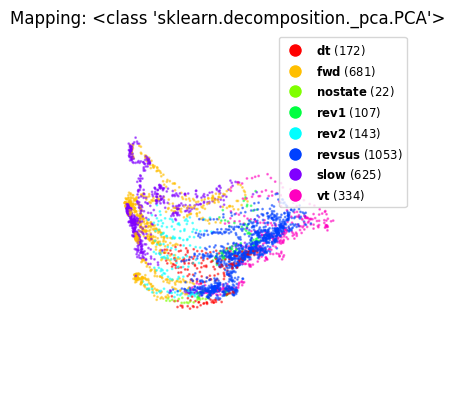

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


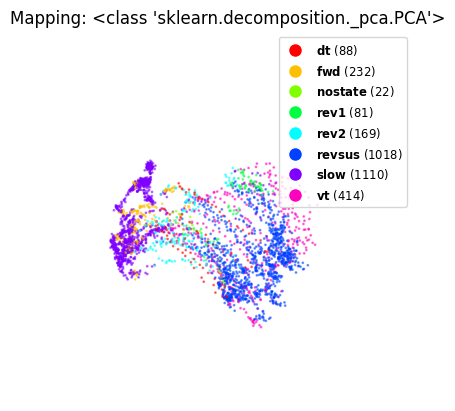

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


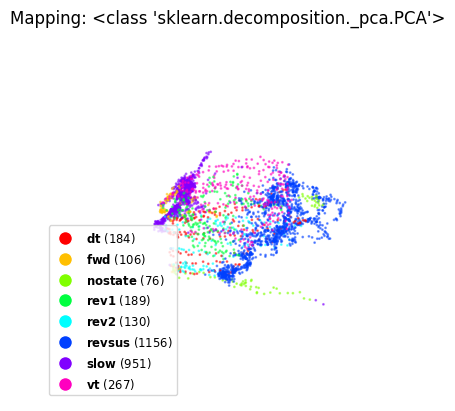

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


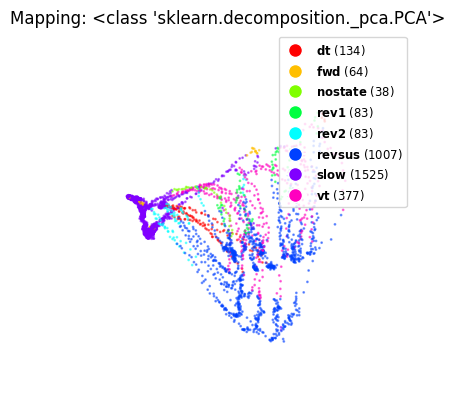

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


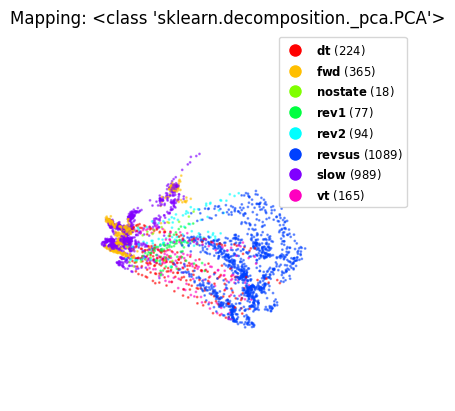

WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


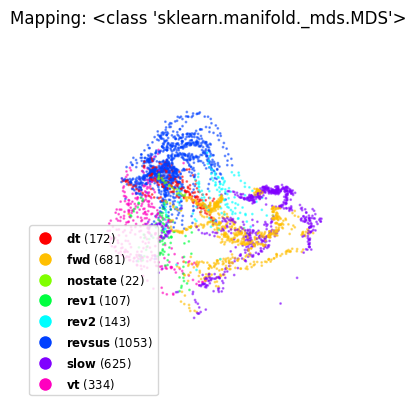

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


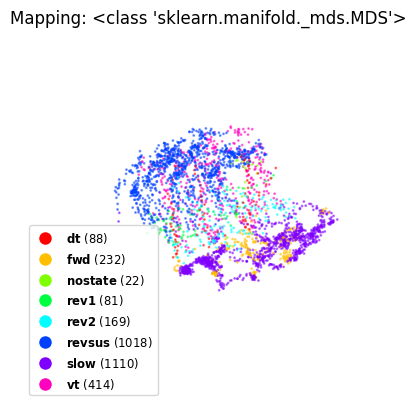

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


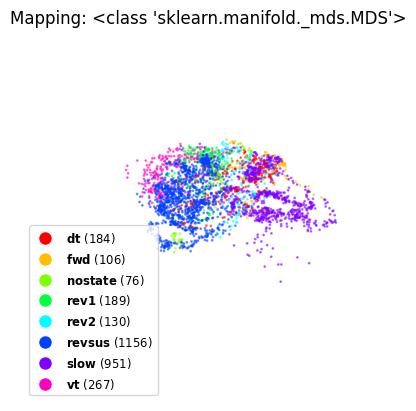

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


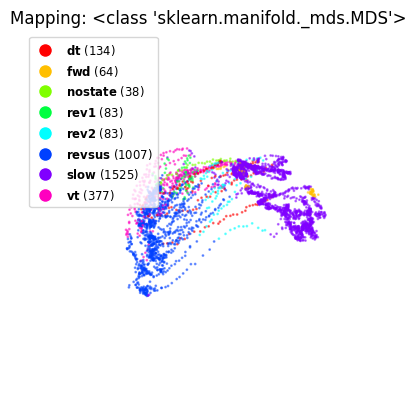

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


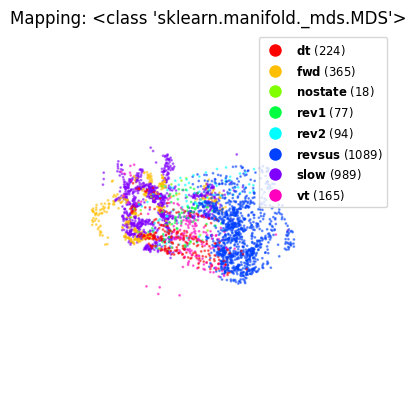

WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


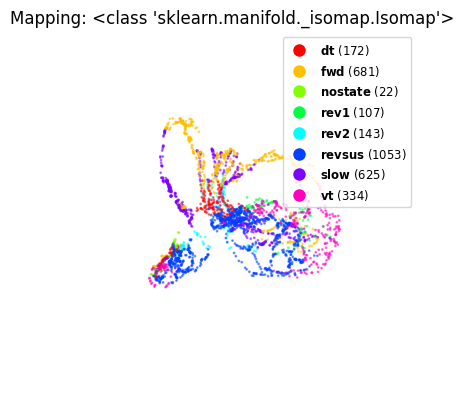

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


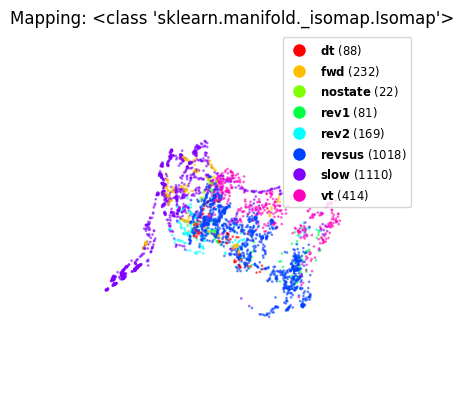

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


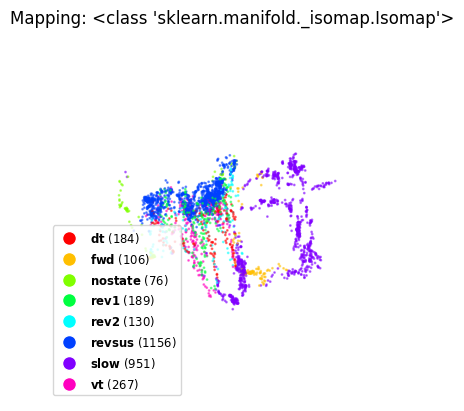

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


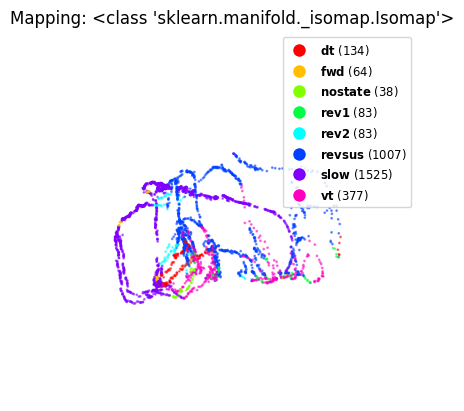

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


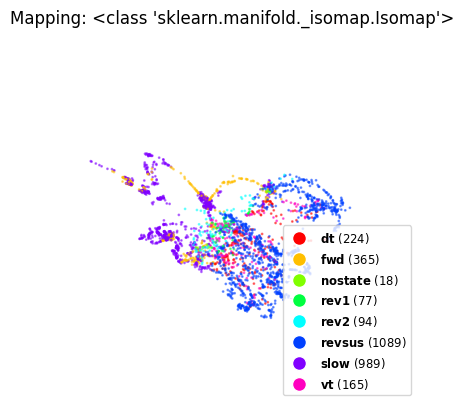

WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


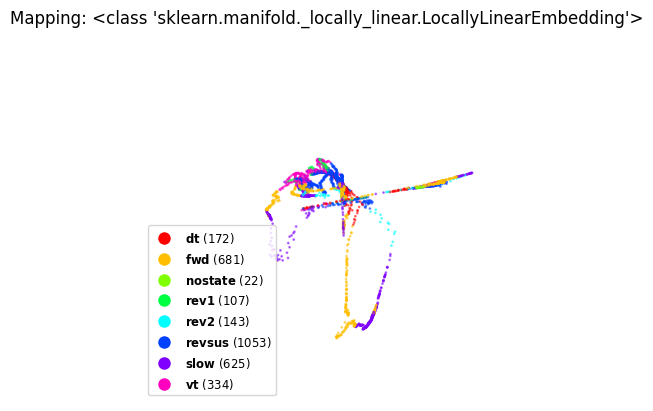

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


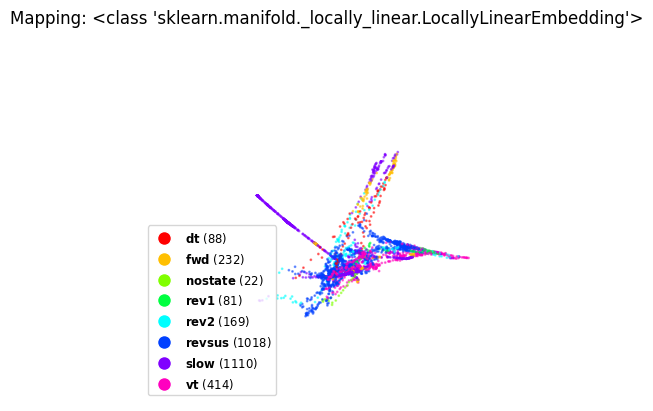

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


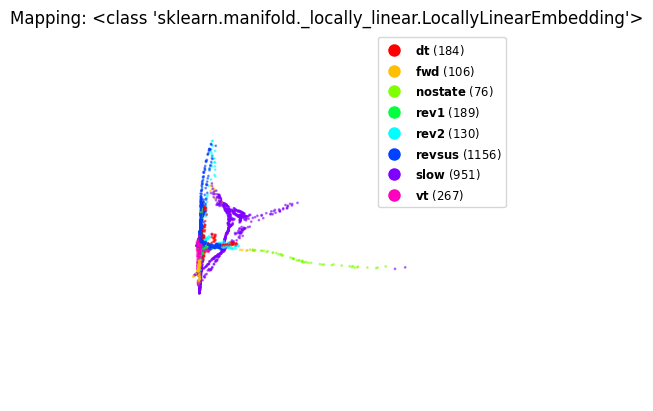

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


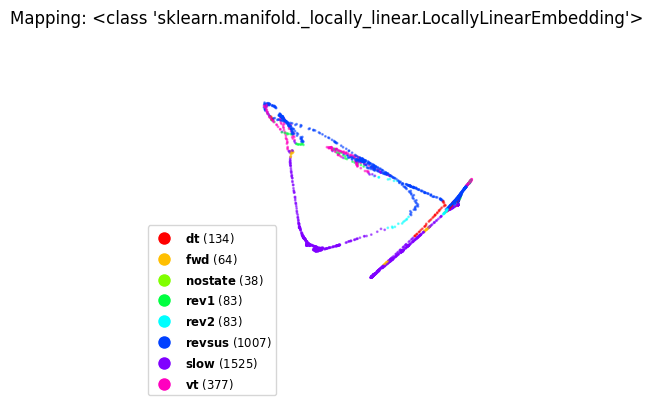

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


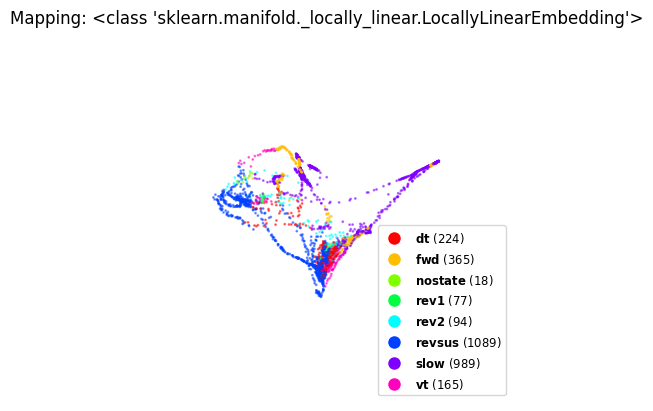

WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


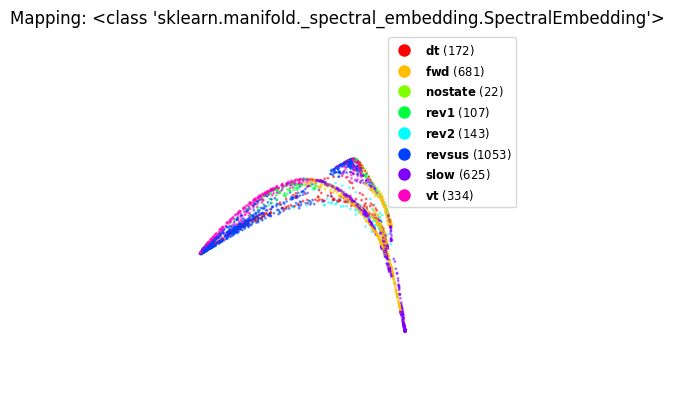

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


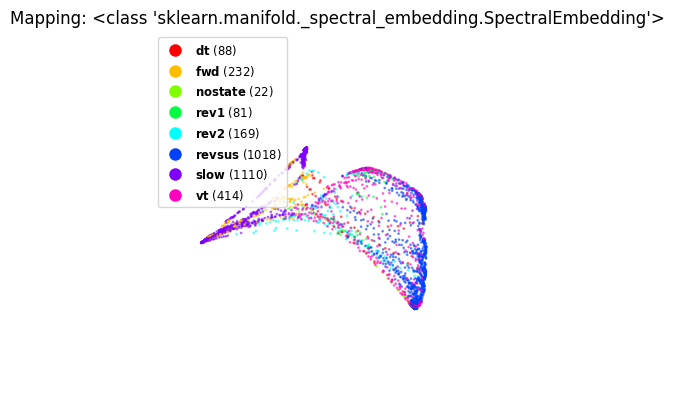

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


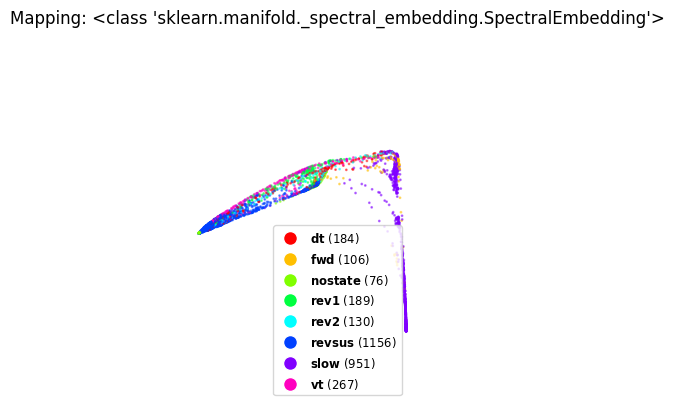

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


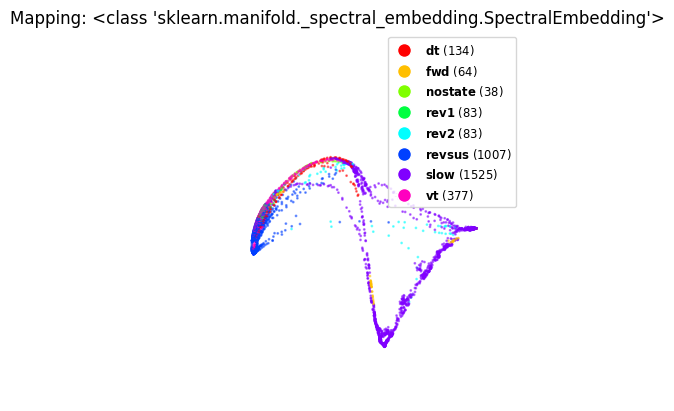

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


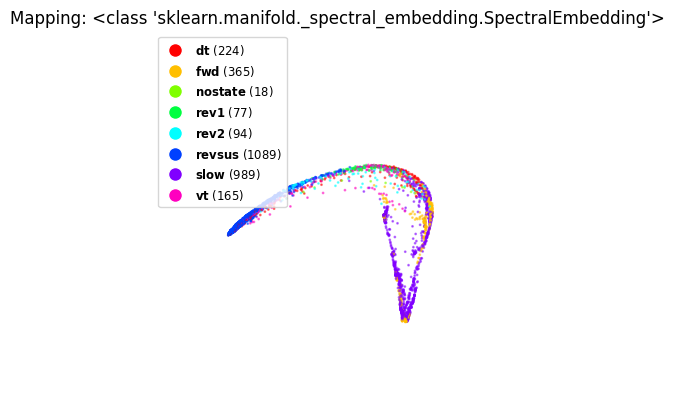

WORM #0
HAVE mapping MODEL
Points have coordinate shape:  (3137, 3)


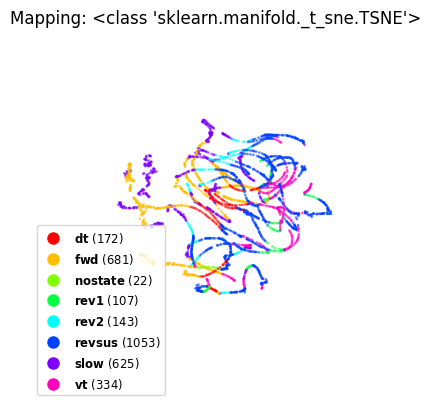

WORM #1
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


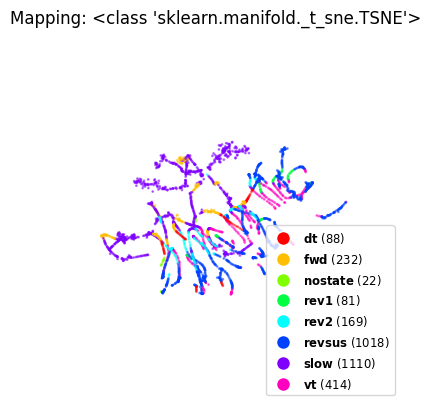

WORM #2
HAVE mapping MODEL
Points have coordinate shape:  (3059, 3)


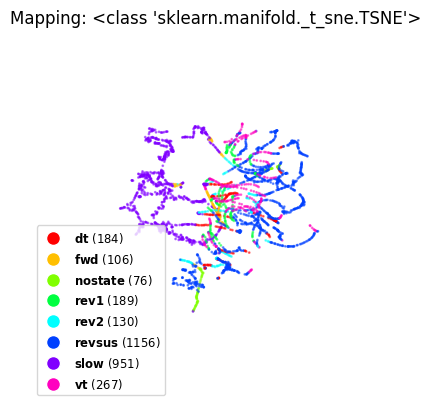

WORM #3
HAVE mapping MODEL
Points have coordinate shape:  (3311, 3)


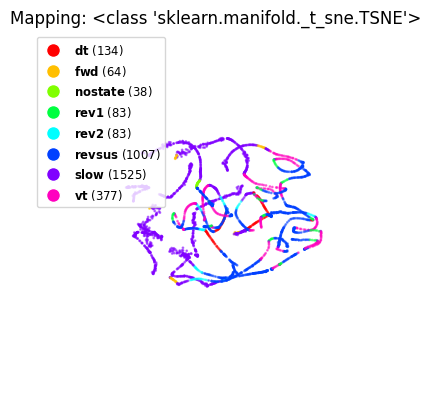

WORM #4
HAVE mapping MODEL
Points have coordinate shape:  (3021, 3)


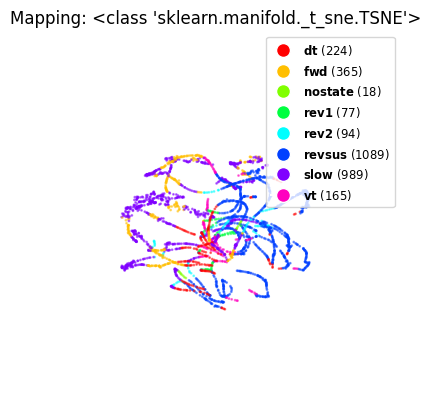

In [4]:
for d in dim_reds:
	for i, worm in enumerate(WORMS):
		print(f'WORM #{i}')
		vs = worm.createVisualizer(d)
		vs.plot_mapping(show_legend=True)


In [ ]:

for worm in WORMS:
	vs = worm.createVisualizer(dim_reds[0])
	vs.plot_mapping(show_legend=True)

	for dim_red in dim_reds[1:]:
		vs.change_mapping(dim_red)
		vs.plot_mapping(show_legend=True)


Losses 0.004383 0.000322 0.004706: 100%|██████████| 2000/2000 [01:44<00:00, 19.19it/s]


Points have coordinate shape:  (3119, 3)


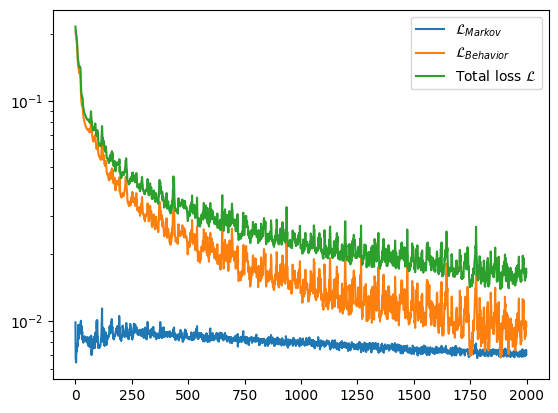

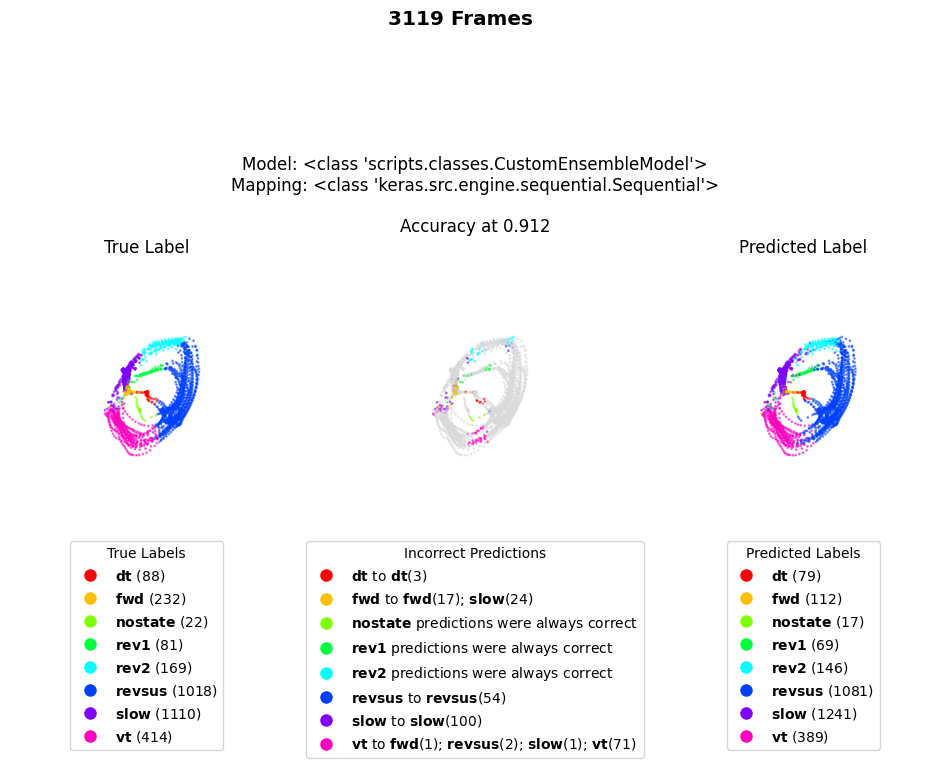

Some points 15 used for accuracy calculation of the model are not plotted, since the mapping does not include them.


True

In [3]:
# Creating a Visualizer (BundleNet) from the data but still using the Logistic Regression as a prediction model in the plots.
%matplotlib inline
vs = data.createVisualizer(epochs=2000, l_dim=3, use_predictor=False)
vs.plot_loss()
vs.make_comparison(quivers=False, show_legend=True)

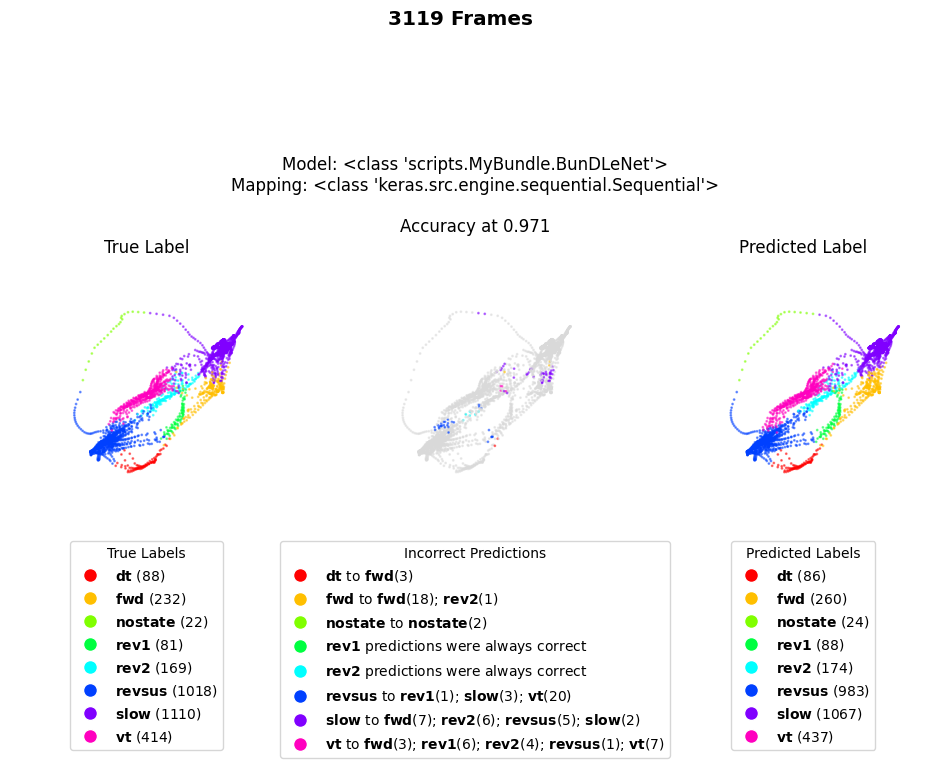

In [9]:
# Change to using the BundleNEt Predictor in the plots. Also saving the weights to the standard directory.
vs.useBundlePredictor()
vs.make_comparison(quivers=False, show_legend=True)
vs.save_weights()

Points have coordinate shape:  (3119, 3)


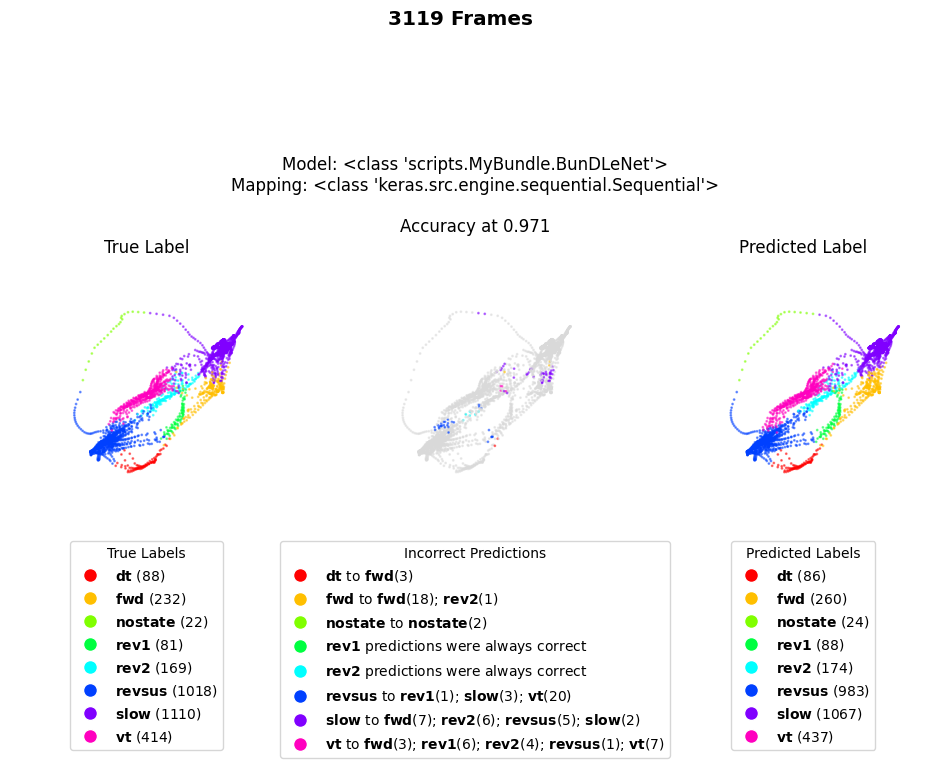

True

In [10]:
# Loading the weights from the standard directory and making a comparison with the BundleNet-Predictor.
vs_loaded = data.loadBundleVisualizer(use_predictor=True)
vs_loaded.make_comparison(quivers=False, show_legend=True)

This does mean that the BundleNet Predictor (accuracy = 0.971) seems to be a lot better than the simple Logistic Regression (accuracy = 0.912), for predicting behavior. Keep in mind tough that the accuracy on the plots is calculated only by the points shown (without first 15 points), however in this case the accuracy of the Logistic Regression is not higher with these points added as we see above (accuracy = 0.912252712188896).

In [5]:
# I am creating a Visualizer with a 20-dimensional latent space 
vs2 = data.createVisualizer(epochs=2000, l_dim=20, use_predictor=True)

Losses 0.002314 0.000011 0.002325: 100%|██████████| 2000/2000 [01:59<00:00, 16.80it/s]


Points have coordinate shape:  (3119, 20)


X (20, 3119)
Y (3119,)
Y-names (8,)
X-names (20,)


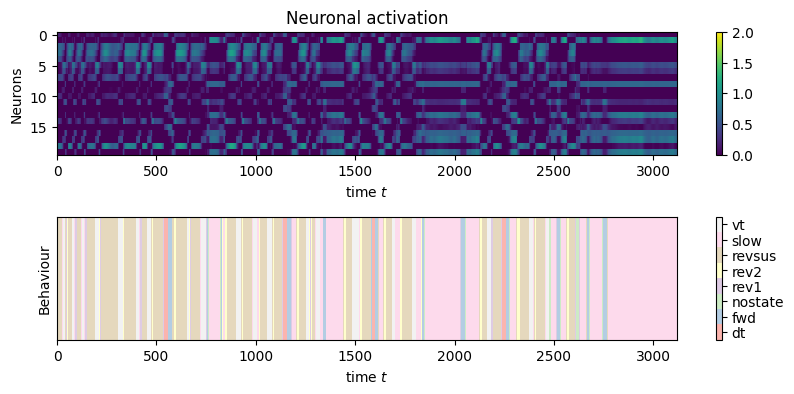

Accuracy: 0.9868547611413915
Probability map has shape: (3119, 28)
HAVE mapping MODEL
Points have coordinate shape:  (3119, 3)


In [6]:
# This Visualizer is used to create a new Data-object, where I fit a Logistic Regression
newdata = vs2.use_latent_dim_as_input()
newdata.plotting_neuronal_behavioural()
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
newdata.fit_model(logreg, binary=True)

newvs = newdata.createVisualizer(PCA(n_components=3))

0.05  or  0.10170152
0.05  or  0.10170152
0.05  or  0.10170152


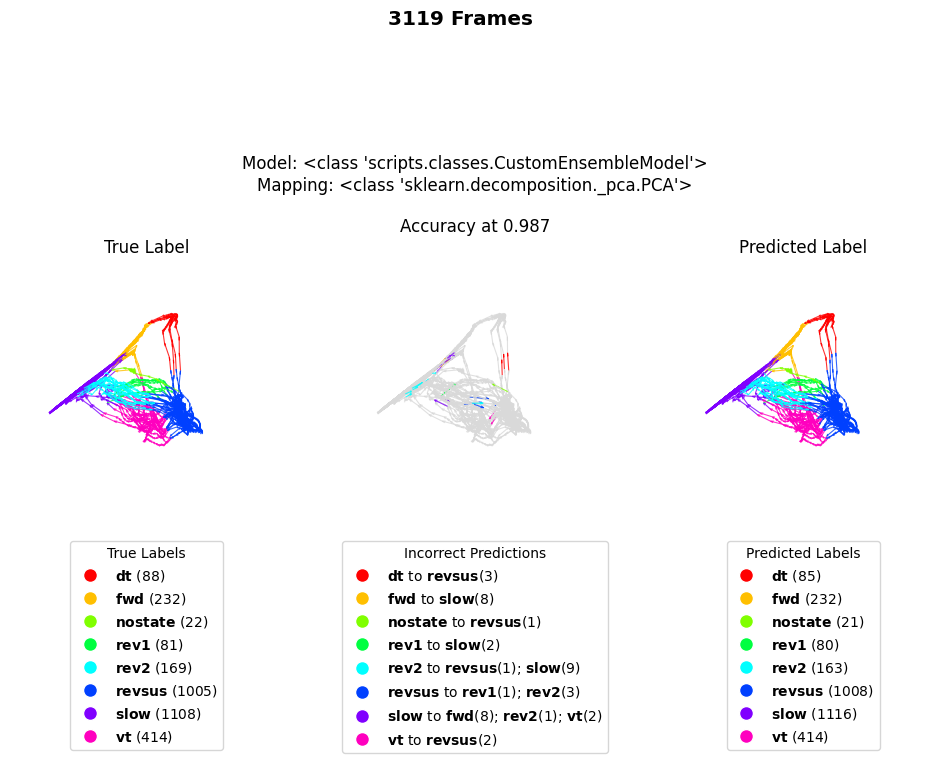

True

In [7]:
# Here I am plotting the new BundleNet with the Logistic Regression
%matplotlib inline
newvs.make_comparison(show_legend=True)

HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)
0.05  or  0.08818631669479775
0.05  or  0.08818631669479775
0.05  or  0.08818631669479775


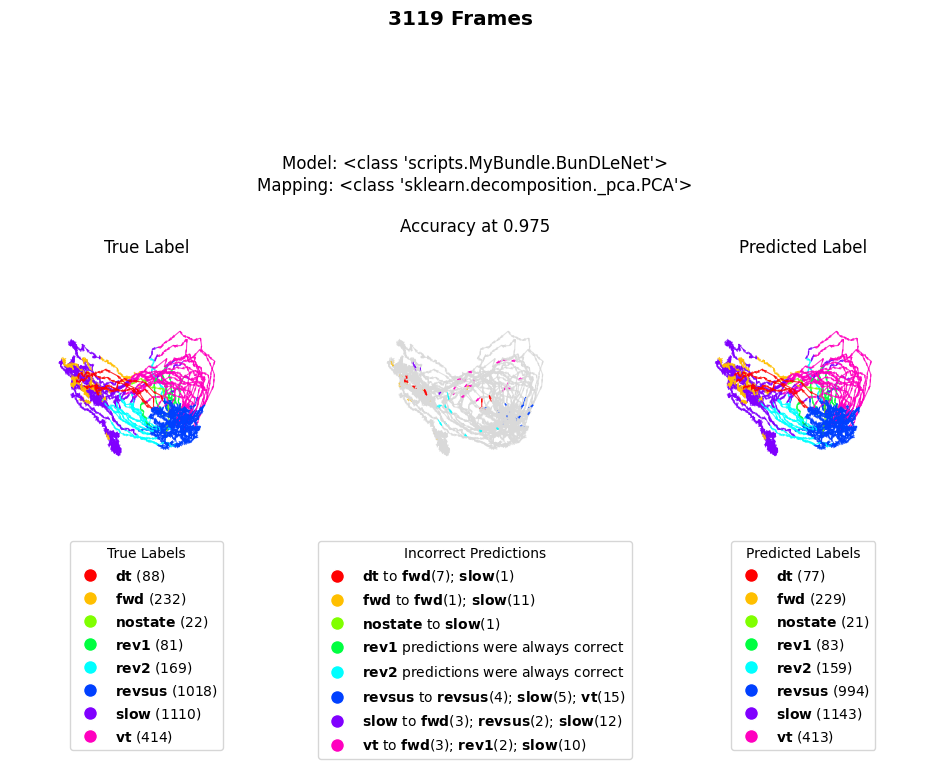

The prediction has fewer points than the true labels. Therefore 15 points are not plotted and also not used for accuracy calculation of the model
HAVE mapping MODEL
Points have coordinate shape:  (3134, 3)


True

In [8]:
# Here I am plotting the older 20-dimensional BundleNet using PCA, to see its accuracy
vs2.change_mapping(PCA(n_components=3))
vs2.useBundlePredictor()
vs2.make_comparison(show_legend=True)

Does this mean that the simple Logistic regression is better than the Predictor in the BundleNet? Since they are both using the same input to predict the labels and the Logistic Regression has accuracy of 0.987 while the Predictor only has 0.975.

Could this be due to the fact that the BundleNet is trained with the true labels already and adds some more info in the 20-dimensional dataset? The Logistic Regression picks up on these?

No. I do not think so since the data for the Predictor is the same as already mentioned.

In [ ]:
print(newvs.bundle_tau)


In [ ]:
# Assuming 'A' and 'B' are encoded as strings in your 'Y' variable
b_neurons = [
		'AVAR',
		'AVAL',
		'SMDVR',
		'SMDVL',
		'SMDDR',
		'SMDDL',
		'RIBR',
		'RIBL'
	]

worm_num = 0

matlab = Loader(worm_num)
data = Database(*matlab.data)
data.exclude_neurons(b_neurons)


In [ ]:
# Looking at data
%matplotlib inline
#%matplotlib notebook
data.plotting_neuronal_behavioural()
#data._behavior()
#data._neurons()

# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
#data.cluster_BPT(nrep=2, max_clusters=3, plot_markov=True)


In [ ]:
vs = Visualizer(data, None)

%matplotlib inline
vs.plot_mapping()
%matplotlib notebook
vs.make_movie()



In [ ]:
vs1 = Visualizer(data, None)

vs.attachBundleNet(epochs=3000, l_dim=3)
vs1.attachBundleNet(epochs=3000, l_dim=30)

In [ ]:
new_data = vs.use_latent_dim_as_input()
new_data1 = vs1.use_latent_dim_as_input()


In [ ]:
new_data.plotting_neuronal_behavioural()
new_data1.plotting_neuronal_behavioural()


In [ ]:
# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
new_data.fit_model(logreg, binary=True)
new_data1.fit_model(logreg, binary=True)

%matplotlib inline
new_data.cluster_BPT(nrep=5, max_clusters=20, plot_markov=True)
new_data1.cluster_BPT(nrep=5, max_clusters=20, plot_markov=True)


In [ ]:
%matplotlib inline
new_data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
new_data.step_plot(clusters=5)

In [ ]:
# Adding prediction Model & Cluster BPT
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
data.fit_model(logreg, binary=True)
%matplotlib inline

data.cluster_BPT(nrep=3, max_clusters=20, plot_markov=True)


In [ ]:
# Do some cool plots
print(list(data.xc[:, 5, 0].astype(int)))
%matplotlib inline
data.behavioral_state_diagram(cog_stat_num=2, adj_matrix=True, save=False)
data.step_plot(clusters=5)


In [ ]:
# Add a mapping to create a 3D Visualizer
vs = data.createVisualizer(PCA(n_components=3))


In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
%matplotlib notebook
vs.make_comparison(show_legend=True, quivers=False)


In [ ]:
%matplotlib notebook
vs.make_movie(interval=100, save=False, show_legend=True, grid_off=True, quivers=False)

In [ ]:
# Attach a BundleNet to use tau for mapping into 3D space
vs.attachBundleNet(epochs=1000)


In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
vs.make_comparison(show_legend=True, quivers=True)


In [ ]:
%matplotlib notebook
vs.make_movie(interval=100, save=False, show_legend=True, grid_off=True, quivers=False)


In [ ]:
vs.change_mapping(TSNE(n_components=3))

In [ ]:
%matplotlib inline
vs.plot_mapping(show_legend=False, grid_off=True, quivers=True, show=True)
vs.make_comparison(show_legend=True, quivers=True)


In [ ]:
# Skip if already in dir
import os
os.chdir('..')
print(os.getcwd())


In [ ]:
### LOADING PICKLES ###
import pickle
from scripts.classes import *
print(os.getcwd())

%matplotlib inline

# Load the pickled data back into a Python object
data = []
for i in range(5):
	with open(f'data/pickles/data_worm_{i + 1}_8D.pkl', 'rb') as file:
		loaded_data = pickle.load(file)
		loaded_data.step_plot()
		vs = loaded_data.createVisualizer()
		vs.behavioral_state_diagram()
		data.append(loaded_data.p_markov)
#loaded_data.plot_markov()

data = np.asarray(data)
data = data.mean(axis=2)